In [1]:
from pathlib import Path

from utils import get_exp_features

import numpy as np
import matplotlib.pylab as plt

In [2]:
# load matlab data file
matlab_file = Path(r'./data/EphysData/A026-20200323-01.mat')
data = get_exp_features(matlab_file, downsample=25)
for k in data:
    print('loaded {}: array with shape {}'.format(k, data[k].shape))

loaded distance: array with shape (81510,)
loaded licks: array with shape (81510,)
loaded reward_on: array with shape (81510,)
loaded reward_off: array with shape (81510,)
loaded cue_on: array with shape (81510,)
loaded cue_off: array with shape (81510,)
loaded blackout_on: array with shape (81510,)
loaded blackout_off: array with shape (81510,)


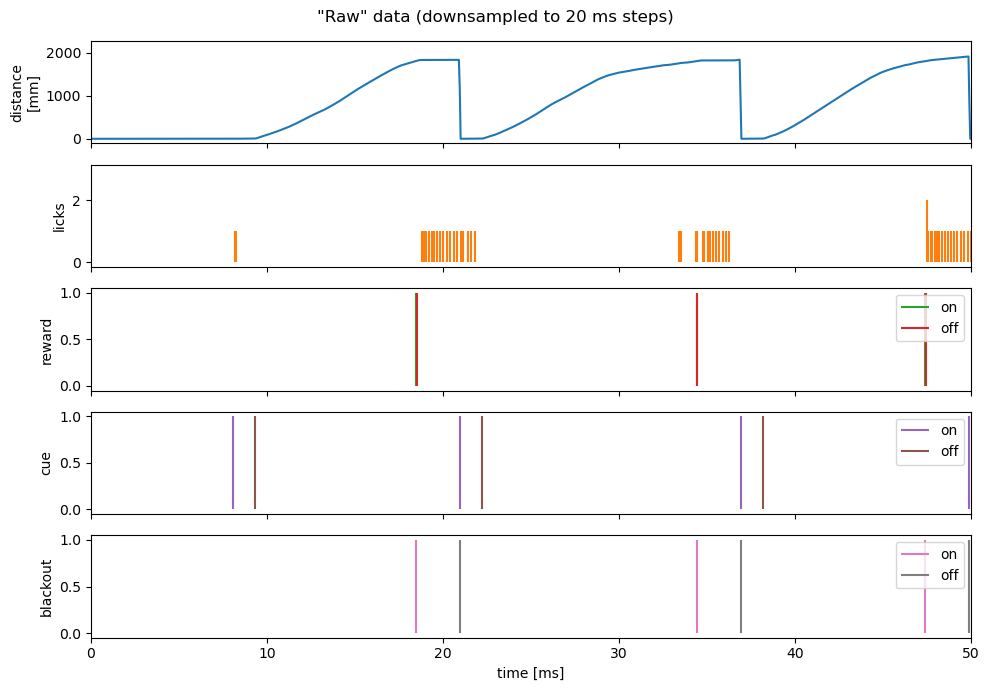

In [3]:
# plot data
fig, axarr = plt.subplots(nrows=5, figsize=(10, 7))
fig.suptitle('"Raw" data (downsampled to 20 ms steps)')
xi, xf = 0, 50

plot = lambda x: ax.plot(np.arange(len(x)) / 20, x )
vlines = lambda x, c, l: ax.vlines(np.arange(len(x)) / 20, 0, x, color=c, label=l)

ax = axarr[0]
plot(data['distance'])
ax.set_ylabel('distance\n[mm]')

ax = axarr[1]
vlines(data['licks'], 'C1', '')
ax.set_ylabel('licks')

ax = axarr[2]
vlines(data['reward_on'], 'C2', 'on')
vlines(data['reward_off'], 'C3', 'off')
ax.set_ylabel('reward')
ax.legend()

ax = axarr[3]
vlines(data['cue_on'], 'C4', 'on')
vlines(data['cue_off'], 'C5', 'off')
ax.set_ylabel('cue')
ax.legend()

ax = axarr[4]
vlines(data['blackout_on'], 'C6', 'on')
vlines(data['blackout_off'], 'C7', 'off')
ax.set_ylabel('blackout')
ax.legend()

for ax in axarr[:-1]:
    ax.set_xticklabels([])
for ax in axarr:
    ax.set_xlim(xi, xf)
ax.set_xlabel('time [ms]')

fig.tight_layout()